In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [82]:
def calc_ols(df1, s1, s2):
    
    pair=df1.iloc[:, [s1, s2]]
    pair.dropna(how='any', axis=0, inplace=True)
    c=np.polyfit(pair.iloc[:, 0], pair.iloc[:, 1],  1, full=False)
    temp_list=pair.iloc[:, 1]-c[0]*pair.iloc[:, 0]
    
    return c[0], temp_list

In [83]:
def form_title(list1, s1, s2, c):
    
    col_title=list1[s1]+'_'+list1[s2]+'_'+str(round(c,2))
    
    return col_title

In [84]:
data_file=pd.read_csv('./data/selected.csv')
data_file['Date']=data_file['Date'].astype('datetime64[ns]')
data_file.set_index('Date', inplace=True)
data_file.index=pd.DatetimeIndex(data_file.index)

scan_results=pd.read_csv('./data/results.csv')
scan_results=scan_results.loc[scan_results.p_value<0.005]
scan_results.sort_values(by='p_value', inplace=True)


In [85]:
scan_results=scan_results.loc[scan_results.i_sect==scan_results.j_sect]
scan_results.info()
scan_results.to_csv('./data/same_sect.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 13 to 2668
Data columns (total 11 columns):
t_stat     300 non-null float64
p_value    300 non-null float64
CI_1       300 non-null float64
CI_5       300 non-null float64
CI_10      300 non-null float64
i          300 non-null int64
j          300 non-null int64
i_sybl     300 non-null object
j_sybl     300 non-null object
i_sect     300 non-null object
j_sect     300 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 28.1+ KB


In [86]:
temp_list=[]
main_list=[]
title_list=[]

stock_list=data_file.columns.tolist()
ts_database=pd.DataFrame(index=data_file.index)

for num in range(0, len(scan_results.index)):

    i=scan_results.iloc[num, 5]
    j=scan_results.iloc[num, 6]
    c, temp_list=calc_ols(data_file, i, j)
    
    scan_results['i_sybl'].iloc[num]=stock_list[i]
    scan_results['j_sybl'].iloc[num]=stock_list[j]
    
    temp_df=pd.DataFrame(temp_list, index=data_file.index)
    ts_database=pd.concat([ts_database, temp_df], axis=1, join='outer')
    col_title=form_title(stock_list, i, j, c)
    title_list.append(col_title)

ts_database.columns=title_list

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\program files\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
ts_database.head()

,AKAM_VRSN_1.03,AKAM_CSCO_0.22,AKAM_AMAT_0.2,AKAM_HPQ_0.06,AKAM_GLW_0.18,AKAM_FFIV_0.66,AKAM_ORCL_0.21,CHK_VLO_4.59,CHK_OKE_2.79,AKAM_NTAP_0.26,...,INTU_NFLX_1.59,ABBV_LH_1.41,CHD_COST_3.48,GLW_INTC_0.93,ILMN_WAT_0.54,CSRA_NFLX_11.84,IDXX_TMO_1.07,CI_UHS_0.72,CAG_KO_1.35,FBHS_UPS_1.25
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.091336,-1.430386,NaN,NaN,NaN,-0.957098,-1.439977,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.236226,-1.473860,NaN,NaN,NaN,-0.889623,-1.465717,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.326795,-1.441255,NaN,NaN,NaN,-0.903395,-1.395298,NaN
1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.378857,-1.440093,NaN,NaN,NaN,-0.918552,-1.371295,NaN
1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.224870,-1.460461,NaN,NaN,NaN,-0.902038,-1.360450,NaN


In [88]:
ts_database.dropna(how='all', axis=0, inplace=True)
ts_database.to_csv('./data/ts_output.csv')

In [483]:
ts=ts_database.iloc[:, 233]
#ts=ts['2000-10-31':]
ts.dropna(inplace=True)
ts.reset_index(drop=True, inplace=True)
ts=ts+30
#ts=np.log(ts)


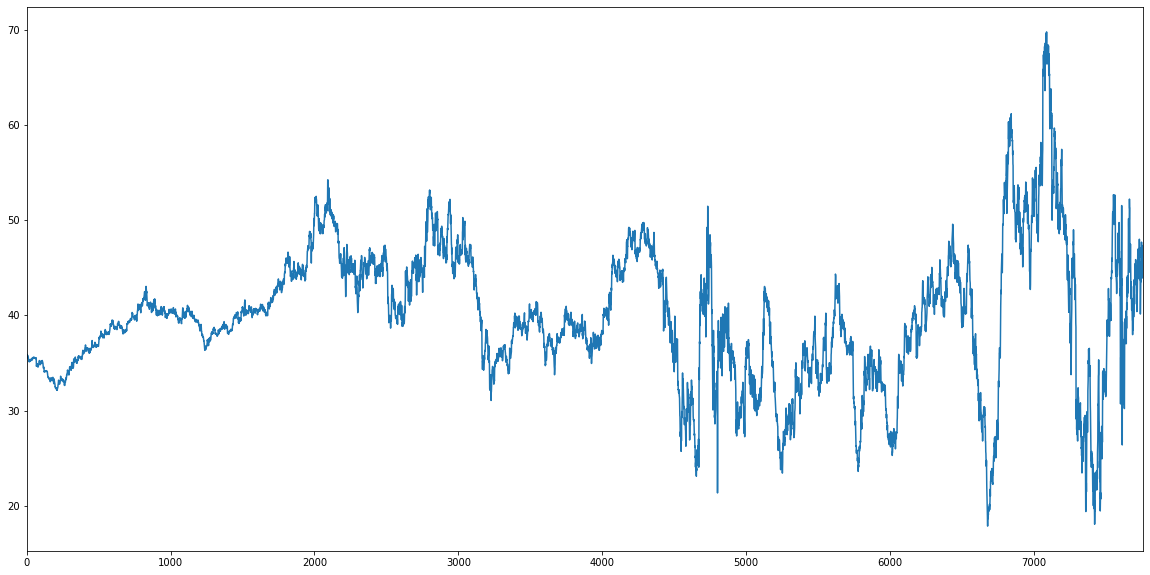

In [484]:
plt.figure(figsize=(20,10))
ts.plot()
plt.show()

In [480]:
adf_results=adfuller(ts)
print(adf_results)

(-4.174301300067936, 0.0007280994810835781, 32, 6225, {'1%': -3.4314009234692424, '5%': -2.862004414649625, '10%': -2.567017205019274}, 18501.928140381166)


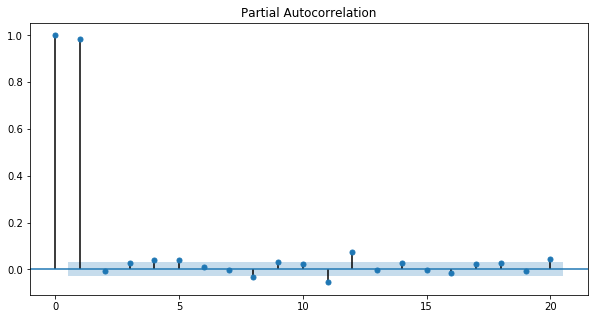

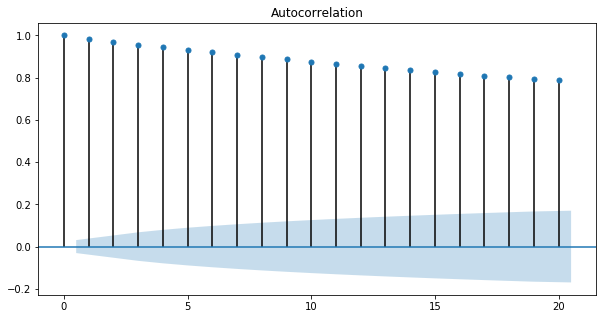

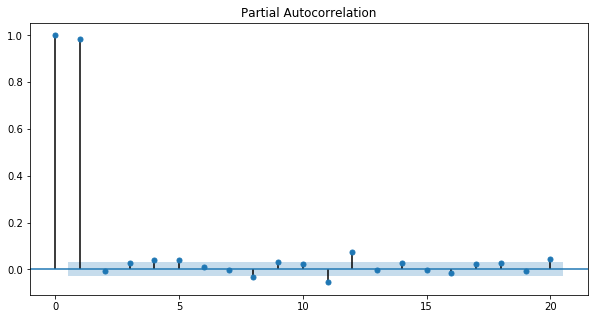

In [210]:
fig, ax=plt.subplots(figsize=(10, 5))
plot_acf(ts, lags=20, ax=ax)
fig, ax1=plt.subplots(figsize=(10, 5))
plot_pacf(ts, lags=20, ax=ax1)

In [221]:
order_aic_bic=[]
for p in range(10):
    for q in range(10):
        try:
            model=SARIMAX(ts, order=(p, 0, q))
            results=model.fit()
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, np.nan, np.nan))
order_df=pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
order_df=order_df.dropna(axis=0)
print(order_df.sort_values('aic'))
print(order_df.sort_values('bic'))

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to conv

    p  q           aic           bic
19  1  9 -17637.049945 -17573.964987
29  2  9 -17635.513787 -17566.693832
79  7  9 -17633.362536 -17535.867600
39  3  9 -17633.281412 -17558.726461
89  8  9 -17631.460975 -17528.231043
.. .. ..           ...           ...
4   0  4   2323.709425   2352.384406
3   0  3   4867.051541   4889.991526
2   0  2   7782.560865   7799.765853
1   0  1  10900.017681  10911.487673
0   0  0  14059.169093  14064.904089

[96 rows x 4 columns]
    p  q           aic           bic
10  1  0 -17628.717019 -17617.247027
11  1  1 -17626.840234 -17609.635246
20  2  0 -17626.613948 -17609.408960
21  2  1 -17624.908755 -17601.968770
30  3  0 -17624.859462 -17601.919477
.. .. ..           ...           ...
4   0  4   2323.709425   2352.384406
3   0  3   4867.051541   4889.991526
2   0  2   7782.560865   7799.765853
1   0  1  10900.017681  10911.487673
0   0  0  14059.169093  14064.904089

[96 rows x 4 columns]


                               SARIMAX Results                                
Dep. Variable:             FBHS_UPS_0   No. Observations:                 2287
Model:               SARIMAX(1, 0, 9)   Log Likelihood                8829.525
Date:                Sun, 01 Nov 2020   AIC                         -17637.050
Time:                        02:04:16   BIC                         -17573.965
Sample:                             0   HQIC                        -17614.043
                               - 2287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.33e-06   7.49e+05      0.000       1.000       1.000
ma.L1          0.0197      0.013      1.458      0.145      -0.007       0.046
ma.L2          0.0005      0.013      0.040      0.9

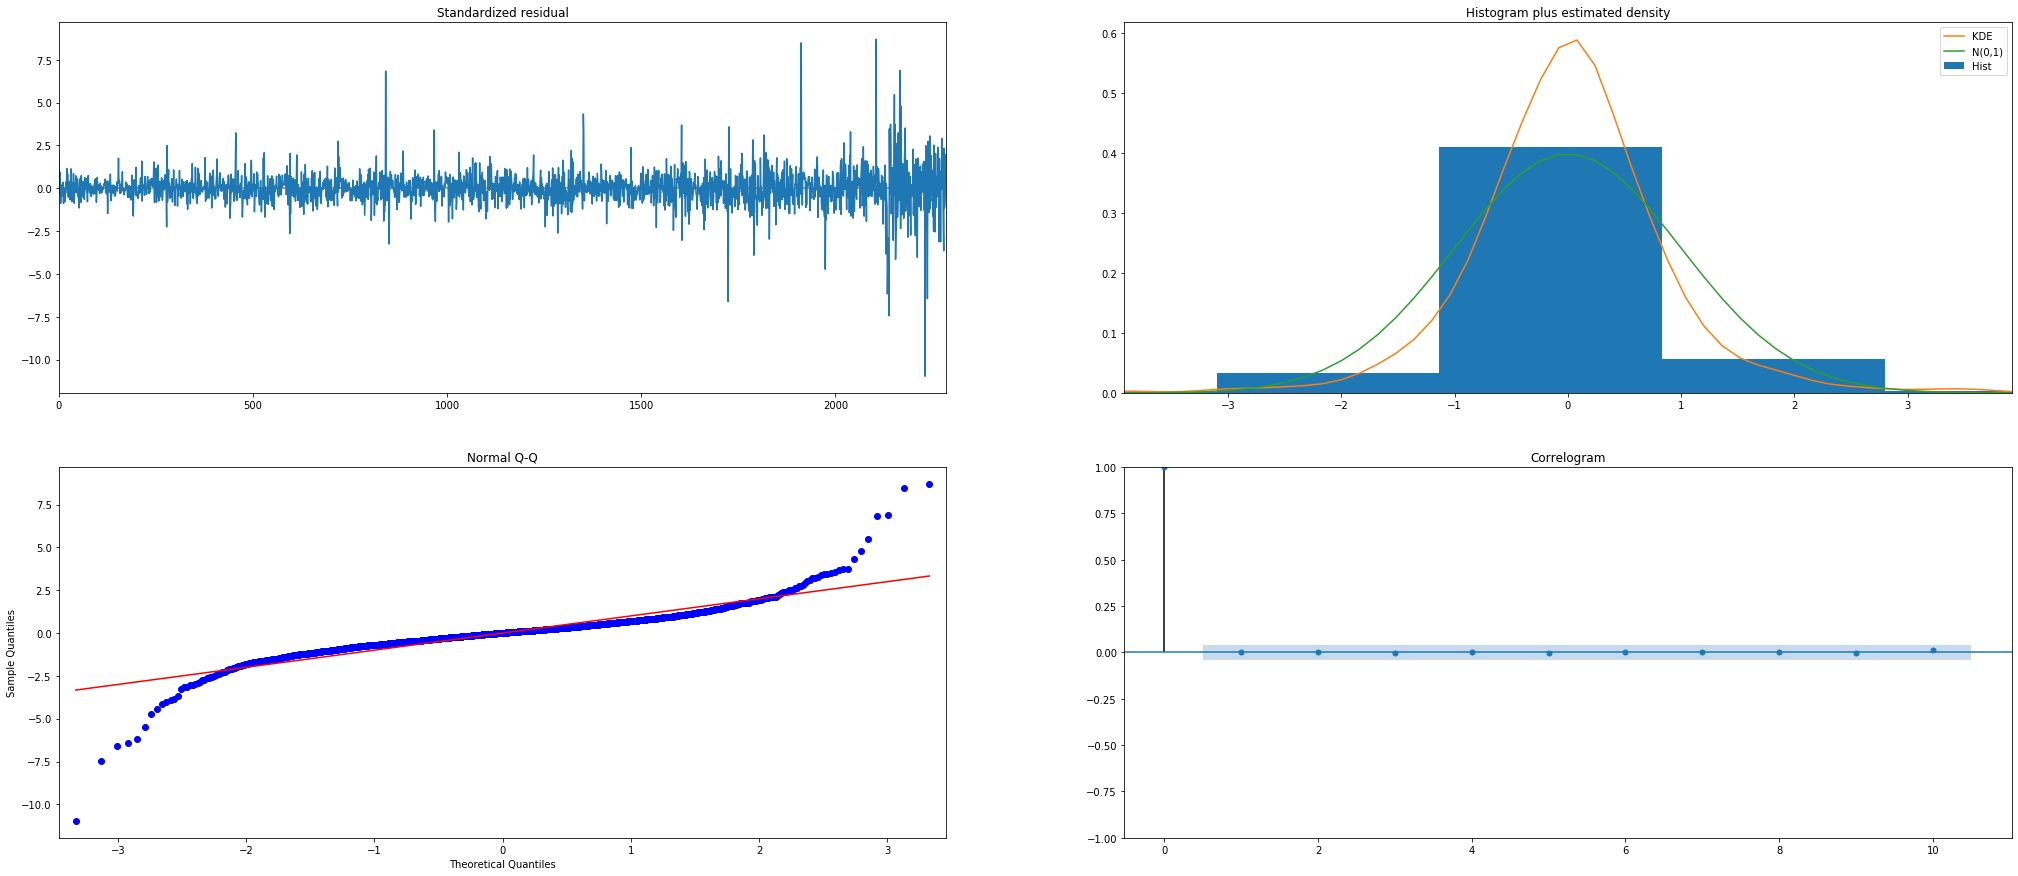

In [226]:
model=SARIMAX(ts, order=(1, 0, 9))
results=model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(35,15))
plt.show()